In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj

In [60]:
from torch.utils.data import Dataset

class Dset_synth(Dataset):
    def __init__(self):
        print('indexing data...')
        self.data_dir = '/scratch/users/vision/data/abc_data/synthetic_2d/'
        fnames = os.listdir(self.data_dir) # labels start with "gt", images start with "synthetic"
        fnames_Y = {
            f.split('_')[2]: f # key by randseed
            for f in fnames if 'gt' in f
        }
        fnames_X = [f for f in fnames if not 'gt' in f]
        fnames_X_snr = {
            f.split('_')[6]: f # key by randseed
            for f in fnames_X if f.split('_')[-1] == '1.5.tiff'
        }
        
        
        self.data_dict = {
            key: (fnames_X_snr[key], fnames_Y[key])
            for key in fnames_Y.keys()
            if key in fnames_X_snr # just checks for errors
        }
        self.keys = sorted(self.data_dict.keys())
        
    def __getitem__(self, i):
        (fname_x, fname_y) = self.data_dict[self.keys[i]]
        X = imread(oj(self.data_dir, fname_x)) # X = RFP(clathrin) (num_images x H x W)
        Y = imread(oj(self.data_dir, fname_y)) # X = RFP(clathrin) (num_images x H x W)
        return X, Y

    def __len__(self):
        return len(self.keys)

In [61]:
dset = Dset_synth()

indexing data...


In [62]:
x, y = dset[0]

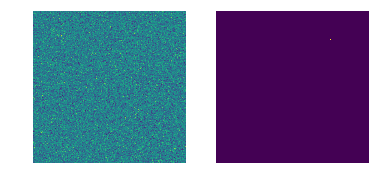

In [69]:
R, C = 1, 2
plt.subplot(R, C, 1)
plt.imshow(x)

plt.subplot(R, C, 2)
plt.imshow(y)

for i in range(1, 3):
    plt.subplot(R, C, i)
    plt.axis('off')

# pytorch patch -> patch